# 한글 텍스트 분석 
1. 순서
    - 문장 -> 단어 -> 키워드 -> 필터링 -> 집계 -> 시각화

## Step1. 필요한 모듈을 실행
- worldcloud 설치할 때 setuptools 에러가 나면 pip install -U pip setuptools

In [3]:
from konlpy.tag import Kkma
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

from collections import Counter
import numpy as np
kkma = Kkma()

---

## Step2. 파일 불러와서 형태소 분석하기

In [9]:
# txt파일 에러 날 시 cp949
data1 = open('data/경주여행_지식인_2016_2.txt',encoding='cp949').read()

# data1 파일에서 명사를 골라내줌
data2 = kkma.nouns(data1)

# 골라낸 명사에서 가장 많이 나온 명사를 카운트
data3 = Counter(data2)

---

## Step3. 불용어 제거하기
- 불용어 필터링 방법
    - 1. 메모장에 불용어 정리
    - 2. 글자 수 지정

- 인터넷은 띄어쓰기가 되지 않은 글이 상당수 존재
    - 전체 문장을 하나의 단어로 인식하는 문제 발생
    - 글자수의 제약이 필요

In [15]:
stop_words = open('data/stop_words.txt',encoding='cp949').read()

# 불용어가 아닌 명사들만 수집
data4 = [each_word for each_word in data2
            if each_word not in stop_words]

# 1글자 이하이거나 10글자 이상인 단어 삭제하기
data5 = []
for i in range(0,len(data4)):
    if len(data4[i]) >= 2 | len(data4[i]) <= 10:
        data5.append(data4[i])

---

## Step4. 단어별 빈도수 집계하기

In [17]:
data6 = Counter(data5)
# 가장 많이 언급된 명사 100개만 본다.
data7 = data6.most_common(100)
tmp_data = dict(data7)

---

## Step5. 워드클라우드 그리기
- 언급 빈도수에 따라 크기가 다름
- 한글 폰트를 기본적으로 지원하지 않음

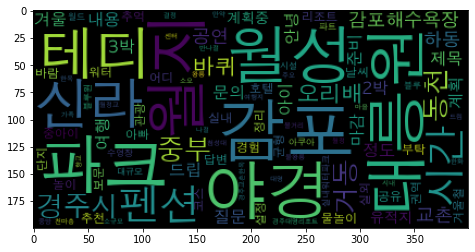

In [20]:
# relative_scaling : 글자간 간격
wordcloud = WordCloud(font_path = 'font/AppleGothic.ttf',
                      relative_scaling=0.2,
                      background_color='black').generate_from_frequencies(tmp_data)

# 워드클라우드 그리기
plt.figure(figsize=(8,4))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()

### 5-1 형태를 가진 사진이나 그림대로 워드클라우드 그리기

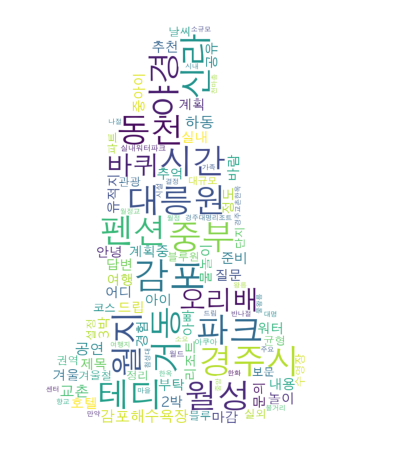

In [33]:
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

# 사용하고자 하는 이미지
alice_mask = np.array(Image.open('image/alice.jpg'))

# 워드 클라우드 생성
wc = WordCloud(font_path='font/AppleGothic.ttf',
               relative_scaling=0.2, mask=alice_mask,
               background_color='white',
               min_font_size=1,
               max_font_size=80,
               max_words=2000).generate_from_frequencies(tmp_data)

# 그리기
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis('off') # 테두리 생성여부
plt.show()

### 5-2 정량적인 수치로 파악하기 어려움
- 그래프로 같이 나타내기

In [28]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

# 많이 언급된 단어 빈도 뽑아내기
import nltk

# 많이 언급된 단어 그래프로 그리기
from nltk.probability import FreqDist

In [30]:
font_location = 'font/AppleGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

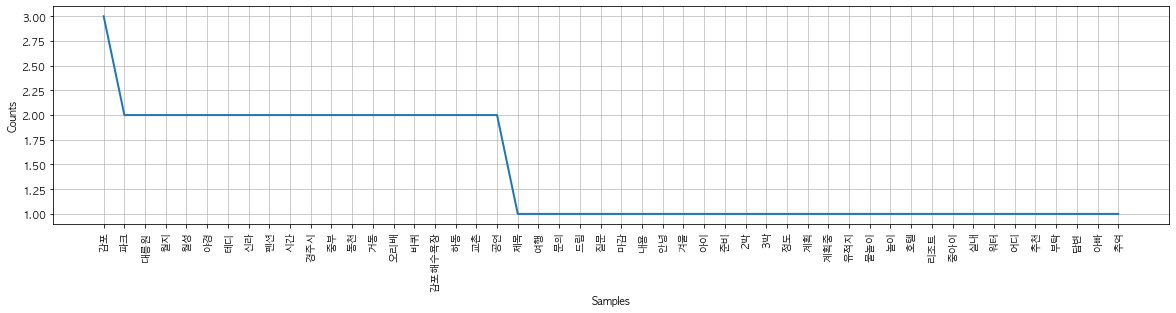

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [37]:
plt.figure(figsize=(20,4))

g_data = FreqDist(tmp_data)
g_data.plot(50)